In [14]:
import psycopg2
import pandas as pd
from password import pw
import matplotlib.pyplot as plt

conn = psycopg2.connect(host="localhost", port = 5432, database="Employee_DB", user="postgres", password=pw)



In [15]:
# Create a cursor object
cur = conn.cursor()

# A sample query of all data from the "vendors" table in the "suppliers" database
cur.execute('SELECT * FROM "Employees"')
query_results = cur.fetchall()
Edf=pd.DataFrame(query_results)
cur.execute('Select * From "Salaries"')
query_results = cur.fetchall()
Sdf=pd.DataFrame(query_results)
cur.execute('Select * From "Titles"')
query_results = cur.fetchall()
Tdf=pd.DataFrame(query_results)

In [16]:
Edf=Edf[[0,1,3,4]]
Edf=Edf.rename(columns={0:"emp_no",1:"emp_title",3:"first_name",4:"last_name"})
Edf.head()

,emp_no,emp_title,first_name,last_name
0,473302,s0001,Hideyuki,Zallocco
1,475053,e0002,Byong,Delgrande
2,57444,e0002,Berry,Babb
3,421786,s0001,Xiong,Verhoeff
4,282238,e0003,Abdelkader,Baumann


In [17]:
Edf

,emp_no,emp_title,first_name,last_name
0,473302,s0001,Hideyuki,Zallocco
1,475053,e0002,Byong,Delgrande
2,57444,e0002,Berry,Babb
3,421786,s0001,Xiong,Verhoeff
4,282238,e0003,Abdelkader,Baumann
...,...,...,...,...
300019,464231,s0001,Constantino,Eastman
300020,255832,e0002,Yuping,Dayang
300021,76671,s0001,Ortrud,Plessier
300022,264920,s0001,Percy,Samarati


In [18]:
Sdf=Sdf.rename(columns={0:"emp_no",1:"salary"})
Sdf.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [19]:
df=pd.merge(Edf,Sdf,on="emp_no")
df

,emp_no,emp_title,first_name,last_name,salary
0,473302,s0001,Hideyuki,Zallocco,40000
1,475053,e0002,Byong,Delgrande,53422
2,57444,e0002,Berry,Babb,48973
3,421786,s0001,Xiong,Verhoeff,40000
4,282238,e0003,Abdelkader,Baumann,40000
...,...,...,...,...,...
300019,464231,s0001,Constantino,Eastman,69696
300020,255832,e0002,Yuping,Dayang,75355
300021,76671,s0001,Ortrud,Plessier,61886
300022,264920,s0001,Percy,Samarati,62772


In [20]:
Tdf=Tdf.rename(columns={0:"emp_title",1:"title"})
Tdf

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


Text(0, 0.5, 'Salary')

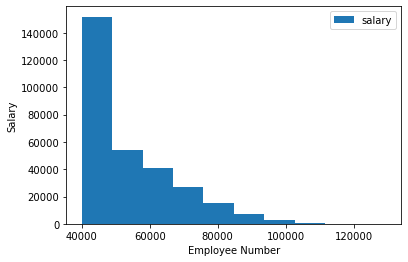

In [21]:
df.plot(kind="hist",x="emp_no",y="salary")
plt.xlabel("Employee Number")
plt.ylabel("Salary")

In [22]:
df1=pd.merge(df,Tdf,on="emp_title")
df1

,emp_no,emp_title,first_name,last_name,salary,title
0,473302,s0001,Hideyuki,Zallocco,40000,Staff
1,421786,s0001,Xiong,Verhoeff,40000,Staff
2,273487,s0001,Christoph,Parfitt,56087,Staff
3,246449,s0001,Subbu,Bultermann,87084,Staff
4,48085,s0001,Venkatesan,Gilg,63016,Staff
...,...,...,...,...,...,...
300019,111400,m0001,Arie,Staelin,72446,Manager
300020,111133,m0001,Hauke,Zhang,71148,Manager
300021,110085,m0001,Ebru,Alpin,60026,Manager
300022,110386,m0001,Shem,Kieras,40000,Manager


<AxesSubplot:>

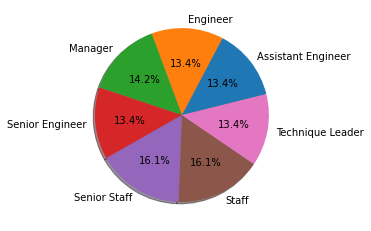

In [37]:
grouped=df1.groupby("title")["salary"].mean().to_frame("Average_Salary").reset_index()
grouped.plot(kind="pie",y="Average_Salary",labels=grouped["title"],autopct="%1.1f%%", shadow=True, startangle=14,legend=None,ylabel="")

In [24]:
df.loc[df["emp_no"]==499942]

,emp_no,emp_title,first_name,last_name,salary
168736,499942,e0004,April,Foolsday,40000


In [25]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()